In [111]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [112]:
"Função para plotar o potencial -> x,y,V"

def plot2D(x, y, V):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, V[:], rstride=1, cstride=1, cmap=cm.magma,
            linewidth=1, antialiased=False)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    plt.show();

In [113]:
"Plota as equipotenciais"
def plot_equip(x,y,V):
    fig = plt.contourf(x,y,V,20,cmap='magma')
    plt.rcParams['figure.figsize'] = (8,8)
    plt.colorbar()
    plt.title('Linhas equipotenciais do Potencial Elétrico')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axes().set_aspect('equal')

In [114]:
"Calcula a equação de Laplace"
def laplace2d(V,nx,ny,l1norm_target):
    l1norm = 1
    contador = 0
    Vn = np.empty_like(V)
    while l1norm > l1norm_target:
        Vn = V.copy()
        avg = np.roll(Vn,1,axis=0)+np.roll(Vn,-1,axis=0)+np.roll(Vn,1,axis=1)+np.roll(Vn,-1,axis=1)         
        V = avg/4
        
        #Condições de Contorno
        V[:, 0] = 0  # V = 0 @ x = -1
        V[:, nx-1] = 0  # V = 0 @ x = 1
        V[0,int(round(((nx-1)/2)*(4/5))):int(round(((nx-1)/2)*(6/5)+1))] = 1000  # Placa condutora @ y = -1
        V[ny-1,:] = 0  # V = 0 @ y = 1
        V[0:int(round(((ny-1)/2)*(4/5)+1)),int(round(((nx-1)/2)))] = 1000 #Metal fino em x = 0
        
        #Calculando a norma
        l1norm = np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))
        #l1norm=numpy.max(numpy.absolute(pn - p))
        
        
        contador += 1 
    print("Iterações=",contador)
    return V

In [115]:
def campo_eletrico(V):
    Ex = + np.roll(V, 1, axis = 0) - np.roll(V, -1, axis = 0) #Calculate the discrete derivation
    Ey = +np.roll(V, 1, axis = 1) - np.roll(V, -1, axis = 1)
    E = np.sqrt(Ex**2 + Ey**2)
    return Ex, Ey, E

In [116]:
def plot_campo_eletrico(nx, ny, x, y, Ex, Ey, E):
    #plt.clf()
    #plt.streamplot(x, y, Ey, Ex, density=[1., 1.], color = E, cmap='magma')
    #fig = plt.figure(figsize=(8, 8))
    plt.rcParams['figure.figsize'] = (8,6.5)
    fig, ax = plt.subplots()
    fig = plt.contourf(x,y,V,20,cmap='magma')
    ax.streamplot(x, y, Ey, Ex, density=[1., 1.], color = 'white', cmap='magma')
    ax.plot(x[50], y[0], 'o', color = 'blue', markersize=10) #Marca o ponto que estamos calculando E
    #ax.annotate('', fontsize=16, color = 'black', xy=(x[int((nx-1)/2)], y[int(round(((nx-1)/2)*(8/5)))]), xytext=(x[int(nx-30)], y[int(ny-7)]), arrowprops=dict(facecolor='black', shrink=0.05))
    #ax.text(x[int(nx-30)], y[int(ny-7)], 'Campo de borda',
         #{'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          #'bbox': dict(boxstyle="round", fc='white', ec="black", pad=0.2)})
    plt.xlabel("x", fontsize = 18)
    plt.ylabel("y", fontsize = 18)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    plt.colorbar()
    plt.show()

In [117]:
"Definindo a rede"
nx = 101 #número de divisões em x
ny = 101 #número de divisões em y
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

In [118]:
"Condições de contorno"
V = np.zeros((ny, nx))  # create a XxY vector of 0's
V[:, 0] = 0  # V = 0 @ x = -1
V[:, nx-1] = 0  # V = 0 @ x = 1
V[0,int(round(((nx-1)/2)*(4/5))):int(round(((nx-1)/2)*(6/5)+1))] = 1000  # Placa condutora @ y = -1
V[ny-1,:] = 0  # V = 0 @ y = 1
V[0:int(round(((ny-1)/2)*(4/5)+1)),int(round(((nx-1)/2)))] = 1000 # Metal Fino em x = 0

In [119]:
"Inicia o relógio"
t0 = time.process_time()

In [120]:
V=laplace2d(V,nx,ny,1e-8)

Iterações= 14892


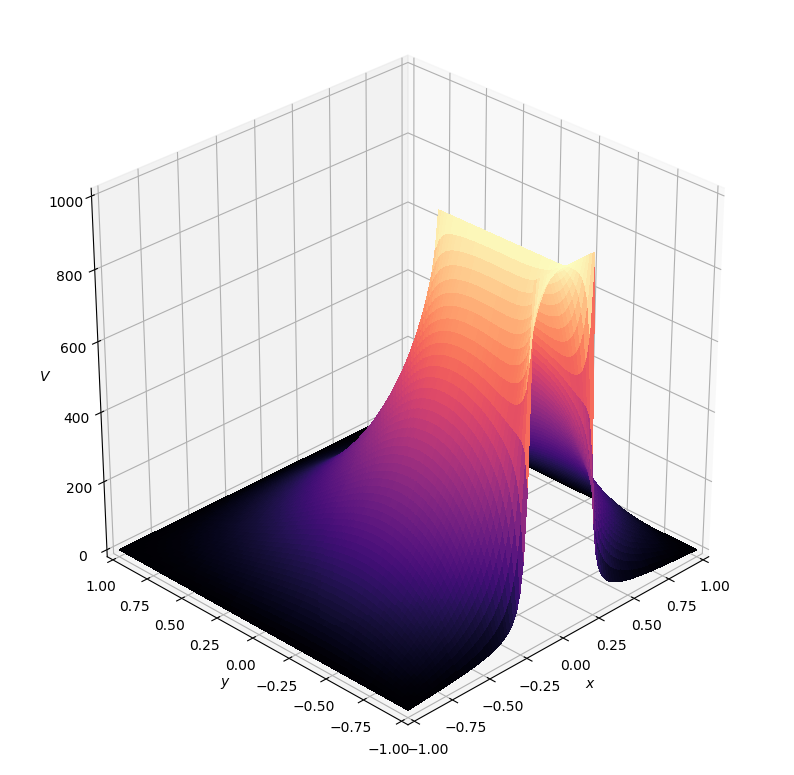

In [121]:
plot2D(x, y, V)

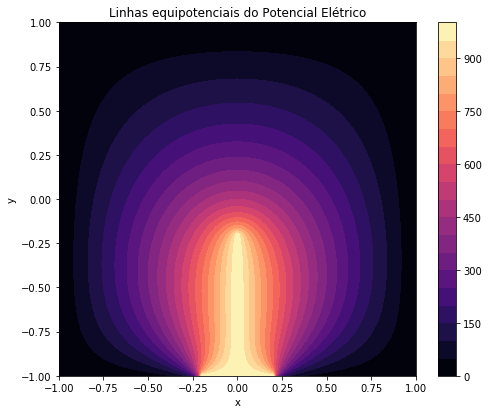

In [122]:
plot_equip(x,y,V)
#plt.savefig('Equip.png')

In [123]:
"Termina o relógio e conta"
t1 = time.process_time()
dt = t1 - t0
print('Tempo =', dt)

Tempo = 23.293082


In [124]:
"Calculando o campo eletrico"
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))
Ex, Ey, E = campo_eletrico(V)

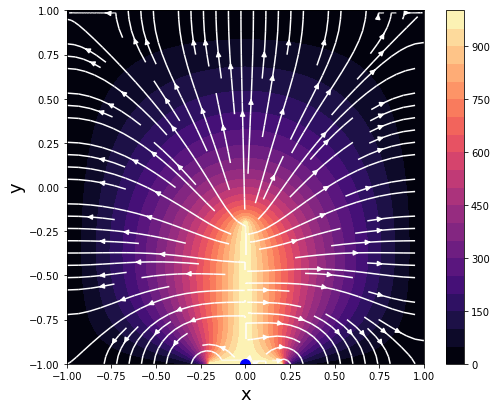

In [125]:
"Plotando o campo eletrico"
plot_campo_eletrico(nx, ny, x, y, Ex, Ey, E)

In [126]:
E[int(round(((ny-1)/2)*(4/5))+1),int(round(((nx-1)/2)))]

217.36101806078022

In [127]:
np.max(E)

1000.0

In [128]:
E

array([[0.62675421, 1.77273151, 2.80697517, ..., 2.80697517, 1.77273151,
        0.62675421],
       [1.25124756, 2.79888627, 3.54543943, ..., 3.54543943, 2.79888627,
        1.25124756],
       [1.87124386, 3.94681413, 4.50699983, ..., 4.50699983, 3.94681413,
        1.87124386],
       ...,
       [0.3535606 , 0.79053403, 0.99969425, ..., 0.99969425, 0.79053403,
        0.3535606 ],
       [0.17672234, 0.49984632, 0.7901194 , ..., 0.7901194 , 0.49984632,
        0.17672234],
       [0.        , 0.45003187, 0.90244049, ..., 0.90244049, 0.45003187,
        0.        ]])

In [129]:
def max_element(A):
    j, (i, l) = max(map(lambda t: (t[0], max(enumerate(t[1]), key=lambda v: v[1])), enumerate(A)), key=lambda v: v[1][1])
    
    return (l, j, i)

In [130]:
print(max_element(E))

(1000.0, 0, 50)


In [131]:
E[0,50]

1000.0